# import labraries and reading the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
titanic = pd.read_csv("TS.csv",sep=";") #i called the csv file TS for abreviation 
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)
titanic["Survived"]=titanic["Survived"].map({"Yes": 1, "No": 0})   
titanic["Sex"]=titanic["Sex"].map({"female": 1, "male": 0}) 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S


# Logistics regression

In [7]:
x = titanic[['Fare','Parch','SibSp','Sex','Pclass']]
y = titanic['Survived']

# split the data to training and testing data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

model = LogisticRegression()
model.fit(x_train, y_train) 

# prdict the Y_testing & Y_training
y_pred_test  = model.predict(x_test) 
y_pred_train=model.predict(x_train)

#print the accuracy 
print("Accuracy={:.2f}".format(model.score(x_test, y_test)))

# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(x, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(x.columns[rfe.support_]))

Accuracy=0.84
Selected features: ['Fare', 'Parch', 'SibSp', 'Sex', 'Pclass']


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Optimal number of features: 3
Selected features: ['SibSp', 'Sex', 'Pclass']


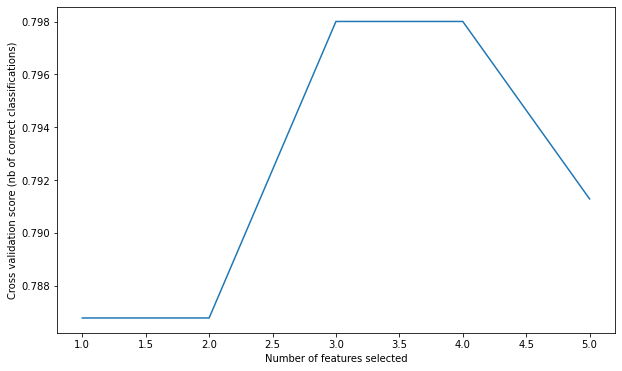

In [8]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(x, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## showing the correlation between the elements of the data

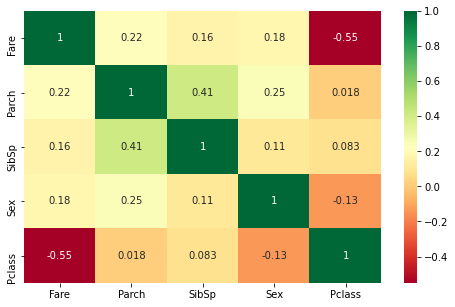

In [18]:
Selected_features = ['Fare', 'Parch', 'SibSp', 'Sex', 'Pclass']
x = x[Selected_features]
plt.subplots(figsize=(8, 5))
sns.heatmap(x.corr(), annot=True, cmap="RdYlGn")
plt.show()

# show the confiusion_matrix_train


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

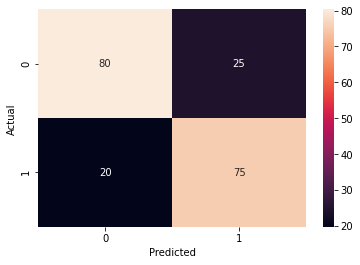

In [25]:
confusion_matrix_train = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap((confusion_matrix_train/np.sum(confusion_matrix_train))*100, annot=True)

#### we see the the TP is about 80% witch is a good classification & for the TN 75% also so the model is effective
#### the model have 25% of FP and 20% of FN wich has a small pourcentage that does not effect

#### TP= the model predict that the passenger has Survived and it was right

#### FP= the model predict that the passenger has Survived and it was Wrong
#### TN= the model predict that the passenger hasn't Survived and it was right
#### FN= the model predict that the passenger has't Survived and it was Wrong

In [27]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       405
           1       0.75      0.68      0.71       263

    accuracy                           0.79       668
   macro avg       0.78      0.77      0.77       668
weighted avg       0.78      0.79      0.78       668



# show the confiusion_matrix_test


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

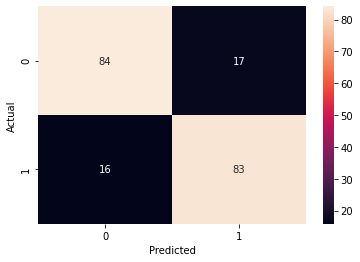

In [21]:
confusion_matrix_test = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap((confusion_matrix_test/np.sum(confusion_matrix_test))*100, annot=True)

#### we see the the TP is about 85% witch is a good classification & forthe TN 83% also so the model is effective
#### the model have 17% of FP and 15% of FN wich is a small pourcentage that does not effect

#### TP= the model predict that the passenger has Survived and it was right

#### FP= the model predict that the passenger has Survived and it was Wrong
#### TN= the model predict that the passenger hasn't Survived and it was right
##### FN= the model predict that the passenger has't Survived and it was Wrong

In [22]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       144
           1       0.83      0.68      0.75        79

    accuracy                           0.84       223
   macro avg       0.84      0.80      0.82       223
weighted avg       0.84      0.84      0.83       223



#### Our model has precision of 2 class btw 83% - 85%
##### Out of all the Passengers that we predicted to be ‘Survived’, we actually get 83% right
#### Out of all the Passengers that we predicted to be ‘Not-Survived’, we actually get 85% right
#### Out of all the passengers that got Survived, we get 92% correct
#### Out of all the passengers that got Not-Survived, we get 70% correct

# What is the AUC - ROC Curve?

#### An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

##### True Positive Rate
##### False Positive Rate

#### AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).
#### AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.
#### ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

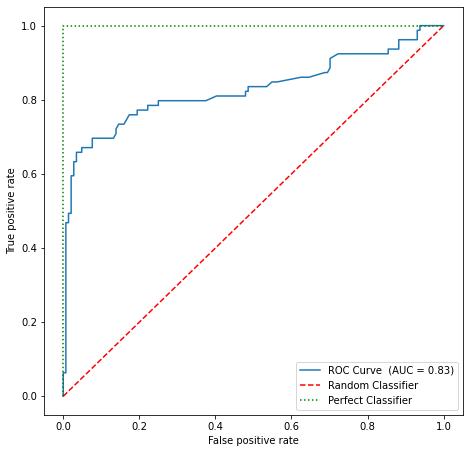

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))
#Create training test splits using all features
#
pipeline.fit(x_train,y_train)
probs = pipeline.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr, tpr, label='ROC Curve  (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()